# Assignment Set 8

by **Amir Mehrpanah** for Deep Learing Course at Data Science Center, SBU


In [ ]:
path = '/data/traffic_signs_classification'
y = pd.read_csv('/data/traffic_signs_classification/labels.csv')

## Importing Libraries

In [ ]:
#@title reading whole data
class_labels = {k:v for k,v in enumerate(y['Name'])}

datagen = ImageDataGenerator()
data = datagen.flow_from_directory(path + '/myData',
                                    target_size=(32, 32),
                                    batch_size=73139,
                                    class_mode='categorical',
                                    shuffle=True )
x, y = data.next()

Found 73139 images belonging to 43 classes.


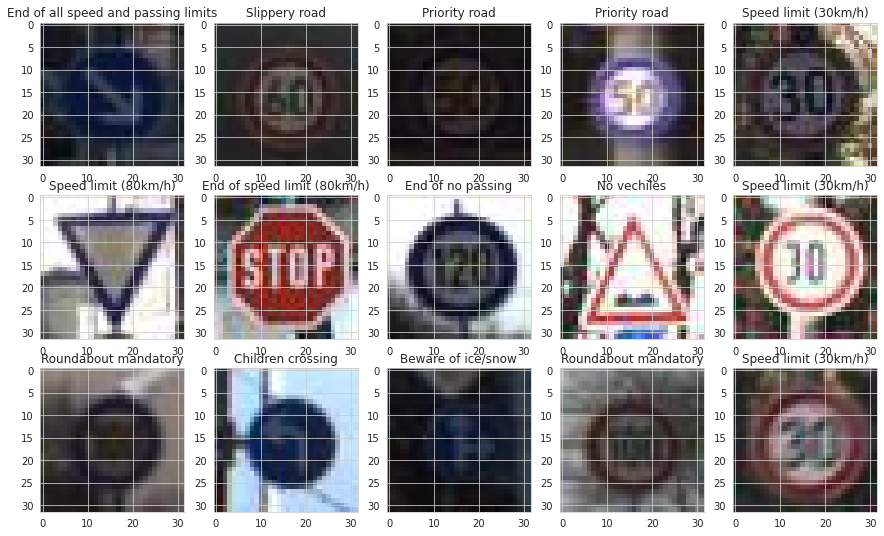

In [ ]:
#@title sample images from the data set
fig, axes = plt.subplots(3,5, figsize=(15,9))
for i,ax in enumerate(axes.flat):
    ax.imshow(x[i].astype('uint8'))
    ax.set_title(str(class_labels[np.argmax(y[i])]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.15)
print("train\t{}\nvalidation\t{}\ntest\t{}".format(x_train.shape,x_val.shape, x_test.shape))

train	(47540, 32, 32, 3)
validation	(3840, 32, 32, 3)
test	(21759, 32, 32, 3)


In [ ]:
#@title Multi Hidden Layer CNNs
epochs =  10#@param {type:"integer"}
verbose =  2#@param {type:"number"}
mdl_pool = {}
for item in 'Adam','RMSprop','Adadelta','SGD':
    name = 'conv_clf_'+item
    
    inputs = keras.Input(shape=(32,32,3))
    x_ = layers.Conv2D(64,3,activation="relu")(inputs)
    x_ = layers.BatchNormalization()(x_)
    x_ = layers.MaxPool2D()(x_)
    x_ = layers.Dropout(0.25)(x_)
    x_ = layers.Conv2D(64,3,activation='relu')(x_)
    x_ = layers.BatchNormalization()(x_)
    x_ = layers.Conv2D(64,3,activation="relu")(x_)
    x_ = layers.MaxPool2D()(x_)
    x_ = layers.Conv2D(64,3,activation="relu")(x_)
    x_ = layers.Flatten()(x_)
    x_ = layers.Dropout(0.35)(x_)
    x_ = layers.Dense(128,activation="relu")(x_)
    x_ = layers.BatchNormalization()(x_)
    x_ = layers.Dropout(0.5)(x_)
    outputs = layers.Dense(43,'softmax')(x_)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name=name)
    model.compile(loss=keras.losses.CategoricalCrossentropy(),
            optimizer=item,
            metrics=['accuracy'])
    mdl_pool[name] = model.fit(x = x_train, y = y_train,
                            batch_size=64, epochs=epochs,
                            verbose=verbose,validation_data=(x_val,y_val)).history
    mdl_pool[name]['eval'] = model.evaluate(x_test, y_test)

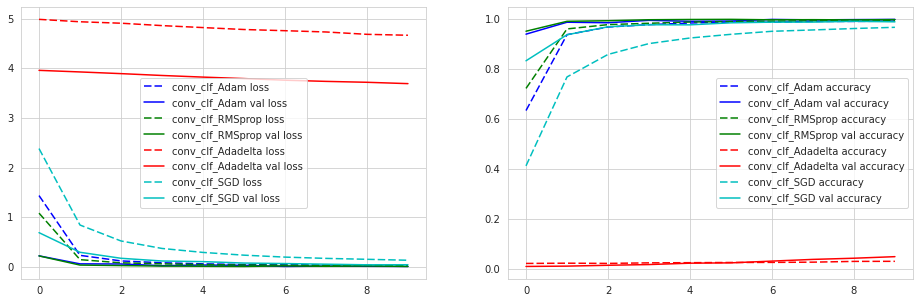

In [ ]:
#@title Plotting Training History
plt.figure(figsize=(16,5))
c = ['b', 'g', 'r', 'c']
plt.subplot(121)
for i,(name,item) in enumerate(mdl_pool.items()):
    plt.plot(item['loss'],linestyle=(0,(5,2)),color=c[i],label = name+' loss')
    plt.plot(item['val_loss'],color=c[i],label = name+' val loss')
plt.legend()

plt.subplot(122)
for i,(name,item) in enumerate(mdl_pool.items()):
    plt.plot(item['accuracy'],linestyle=(0,(5,2)),color=c[i],label = name +' accuracy')
    plt.plot(item['val_accuracy'],color=c[i],label = name+' val accuracy')
plt.legend()

In [ ]:
#@title Evaluation of The Models Trained With Different Optimizers
for n,v in mdl_pool.items():
    print(n)
    print('\tloss',v['eval'][0])
    print('\taccuracy',v['eval'][1])

conv_clf_Adam
	loss 0.011451198210813697
	accuracy 0.99659914
conv_clf_RMSprop
	loss 0.010170186612586177
	accuracy 0.9970587
conv_clf_Adadelta
	loss 3.670826603403271
	accuracy 0.045222666
conv_clf_SGD
	loss 0.04597898069771712
	accuracy 0.9886943
